# Balancer Simulations

# The LP package

This is a model and set of simulations to analyse Balancer AMM pools from a liquidity provider point of view,  
using **historical on-chain data**.

You'll be able to analyse **pool share value** in the following scenarios:  
- C1 Analyse **pool share value over time** (incl. Impermanent Loss)  
- C2 Analyse pool share value **when add** (incl. slippage)
- C3 Analyse pool share value **when exit** (incl. slippage)

For more information on available packages, checkout the [Balancer Simulations documentation](xxxadd link).

## Table of content
here List and links to content (automatically?)

# A. System Context

### System Specification
- Differential Syntax Diagram
- Link to Mathematical Specification
- Link to Software Archtitecture

### Naming Convention

All code provided for this package is following a specific naming convention. You'll find and overview in the documentation. (xxx add link)


### State Variables  


In [1]:
from pprint import pprint as pp
from model.genesis_states import initial_values
pp(initial_values)

{'action_type': 'pool_creation',
 'change_datetime': '2020-12-07 13:34:14',
 'pool': {'generated_fees': 0.0,
          'pool_shares': 100.0,
          'tokens': {'DAI': {'balance': 10000000,
                             'bound': True,
                             'denorm_weight': 10,
                             'weight': 20},
                     'WETH': {'balance': 67738.6361731024,
                              'bound': True,
                              'denorm_weight': 40,
                              'weight': 80}}},
 'token_values': {'DAI': 1.004832, 'WETH': 596.75}}


### Parameters

In [2]:
from decimal import Decimal
parameters = {
    'swap_fee': [Decimal(0.1)]
}
pp(parameters)

{'swap_fee': [Decimal('0.1000000000000000055511151231257827021181583404541015625')]}


# B. cadCAD Notebook

### B1.0 Dependencies
- check dependencies, and link "requirements.txt" 

In [3]:
import pandas as pd 
from cadCAD.configuration.utils import config_sim

# C. Run Simulations 

### C1.0 Initialize Pools


Pull initial balances from data: (how to data parse in readme.file in data folder)

In [4]:
# Date/block timestampStart
# Date/block timestampStop

import pprint
from model.genesis_states import initial_values
pp = pprint.PrettyPrinter(indent=4)

print('## State Variables')
print('# Pool')
gen_values = initial_values
pool = gen_values['pool']
pp.pprint(pool)
print('# External token values feeds')
token_values = gen_values['token_values']
pp.pprint(token_values)

print('# Action Type')
action_type = gen_values['action_type']
pp.pprint(action_type)


## State Variables
# Pool
{   'generated_fees': 0.0,
    'pool_shares': 100.0,
    'tokens': {   'DAI': {   'balance': 10000000,
                             'bound': True,
                             'denorm_weight': 10,
                             'weight': 20},
                  'WETH': {   'balance': 67738.6361731024,
                              'bound': True,
                              'denorm_weight': 40,
                              'weight': 80}}}
# External token values feeds
{'DAI': 1.004832, 'WETH': 596.75}
# Action Type
'pool_creation'


### C1.1 State Update Functions & Policies
The available state update functions replicate the following Balancer Pool Transactions:

a) Add Liquidity
= join policy 
- `p_join_pool`
- `p_join_swap_extern_amount_in`

b) Withdraw Liquidity
= exit policy 
- `p_exit_swap_extern_amount_out`

b) Swap
= swap policy 
- `p_swap_exact_amount_in`

See 'system_policies.py'.  
For a detailed description of the transactions, please visit (Gitbook link)

### C1.2 Partial State Update Blocks


1. Parse action and update pool
2. Update external prices
3. Calculate metrics

The BPool smart contract logic is split in 2, the state update blocks 1 (apply BMath to update pool state) and 3 (use BMath to `get_spot_price` of the tokens after the trades, which is a system metric)



Defined in [partial_state_update_block.py](./model/partial_state_update_block.py)

In [5]:
from model.partial_state_update_block import generate_partial_state_update_blocks

result = generate_partial_state_update_blocks('model/parts/actions_prices-WETH-DAI-0x8b6e6e7b5b3801fed2cafd4b22b8a16c2f2db21a.json')
partial_state_update_blocks = result['partial_state_update_blocks']
pp.pprint(partial_state_update_blocks)

[   {   'policies': {   'user_action': <function ActionDecoder.p_action_decoder at 0x7fac3e1faca0>},
        'variables': {   'action_type': <function s_update_action_type at 0x7fac3e17d0d0>,
                         'change_datetime': <function s_update_change_datetime at 0x7fac3e17d040>,
                         'pool': <function s_update_pool at 0x7fac3e17d160>,
                         'token_values': <function s_update_external_price_feeds at 0x7fac3e17d310>}}]


### C1.3 Configuration




In [6]:
steps_number = result['steps_number']
print('# Steps ', steps_number)
sim_config = config_sim(
    {
        'N': 1,  # number of monte carlo runs
        'T': range(steps_number - 1),  # number of timesteps - 1267203 is last action timestep (timestamp - initial timestamp)
        'M': parameters,  # simulation parameters
    }
)

# Steps  6933


### C1.4 Execution

In [7]:
from model.genesis_states import initial_values

from model.sim_runner import *

df = run(initial_values, partial_state_update_blocks, sim_config)



                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: single_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (6932, 1, 1, 4)
Execution Method: single_proc_exec
Execution Mode: single_threaded
Total execution time: 0.44s


### C1.5 Simulation Output Preparation

In [8]:
from model.parts.utils import post_processing

p_df = post_processing(df)
p_df.tail(10)

,token_dai_balance,token_dai_weight,token_dai_denorm_weight,token_weth_balance,token_weth_weight,token_weth_denorm_weight,generated_fees,pool_shares,token_dai_value,token_weth_value,action_type,change_datetime,simulation,subset,run,substep,timestep
6923,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.002187,629.350,external_price_update,2020-12-22T23:10:00+00:00,0,0,1,1,6923
6924,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.001902,629.035,external_price_update,2020-12-22T23:15:00+00:00,0,0,1,1,6924
6925,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.001704,628.650,external_price_update,2020-12-22T23:20:00+00:00,0,0,1,1,6925
6926,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.001768,630.735,external_price_update,2020-12-22T23:25:00+00:00,0,0,1,1,6926
6927,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.002067,632.365,external_price_update,2020-12-22T23:30:00+00:00,0,0,1,1,6927
6928,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.002002,632.465,external_price_update,2020-12-22T23:35:00+00:00,0,0,1,1,6928
6929,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.001831,632.320,external_price_update,2020-12-22T23:40:00+00:00,0,0,1,1,6929
6930,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.001860,632.160,external_price_update,2020-12-22T23:45:00+00:00,0,0,1,1,6930
6931,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.001711,632.765,external_price_update,2020-12-22T23:50:00+00:00,0,0,1,1,6931
6932,1.115088e+07,20,10,70246.955213,80,40,0.0,100.007809,1.002042,633.725,external_price_update,2020-12-22T23:55:00+00:00,0,0,1,1,6932


# D. Outcome & Conclusions

Note: 
we use the following color code for plots  
a) token balances = green  
b) USD values = orange  
c) pool shares (BPT balances) = blue  

### D1.1 Token Balances

In [9]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FormatStrFormatter
import matplotlib.dates as mdates
import numpy as np

<Figure size 432x288 with 0 Axes>

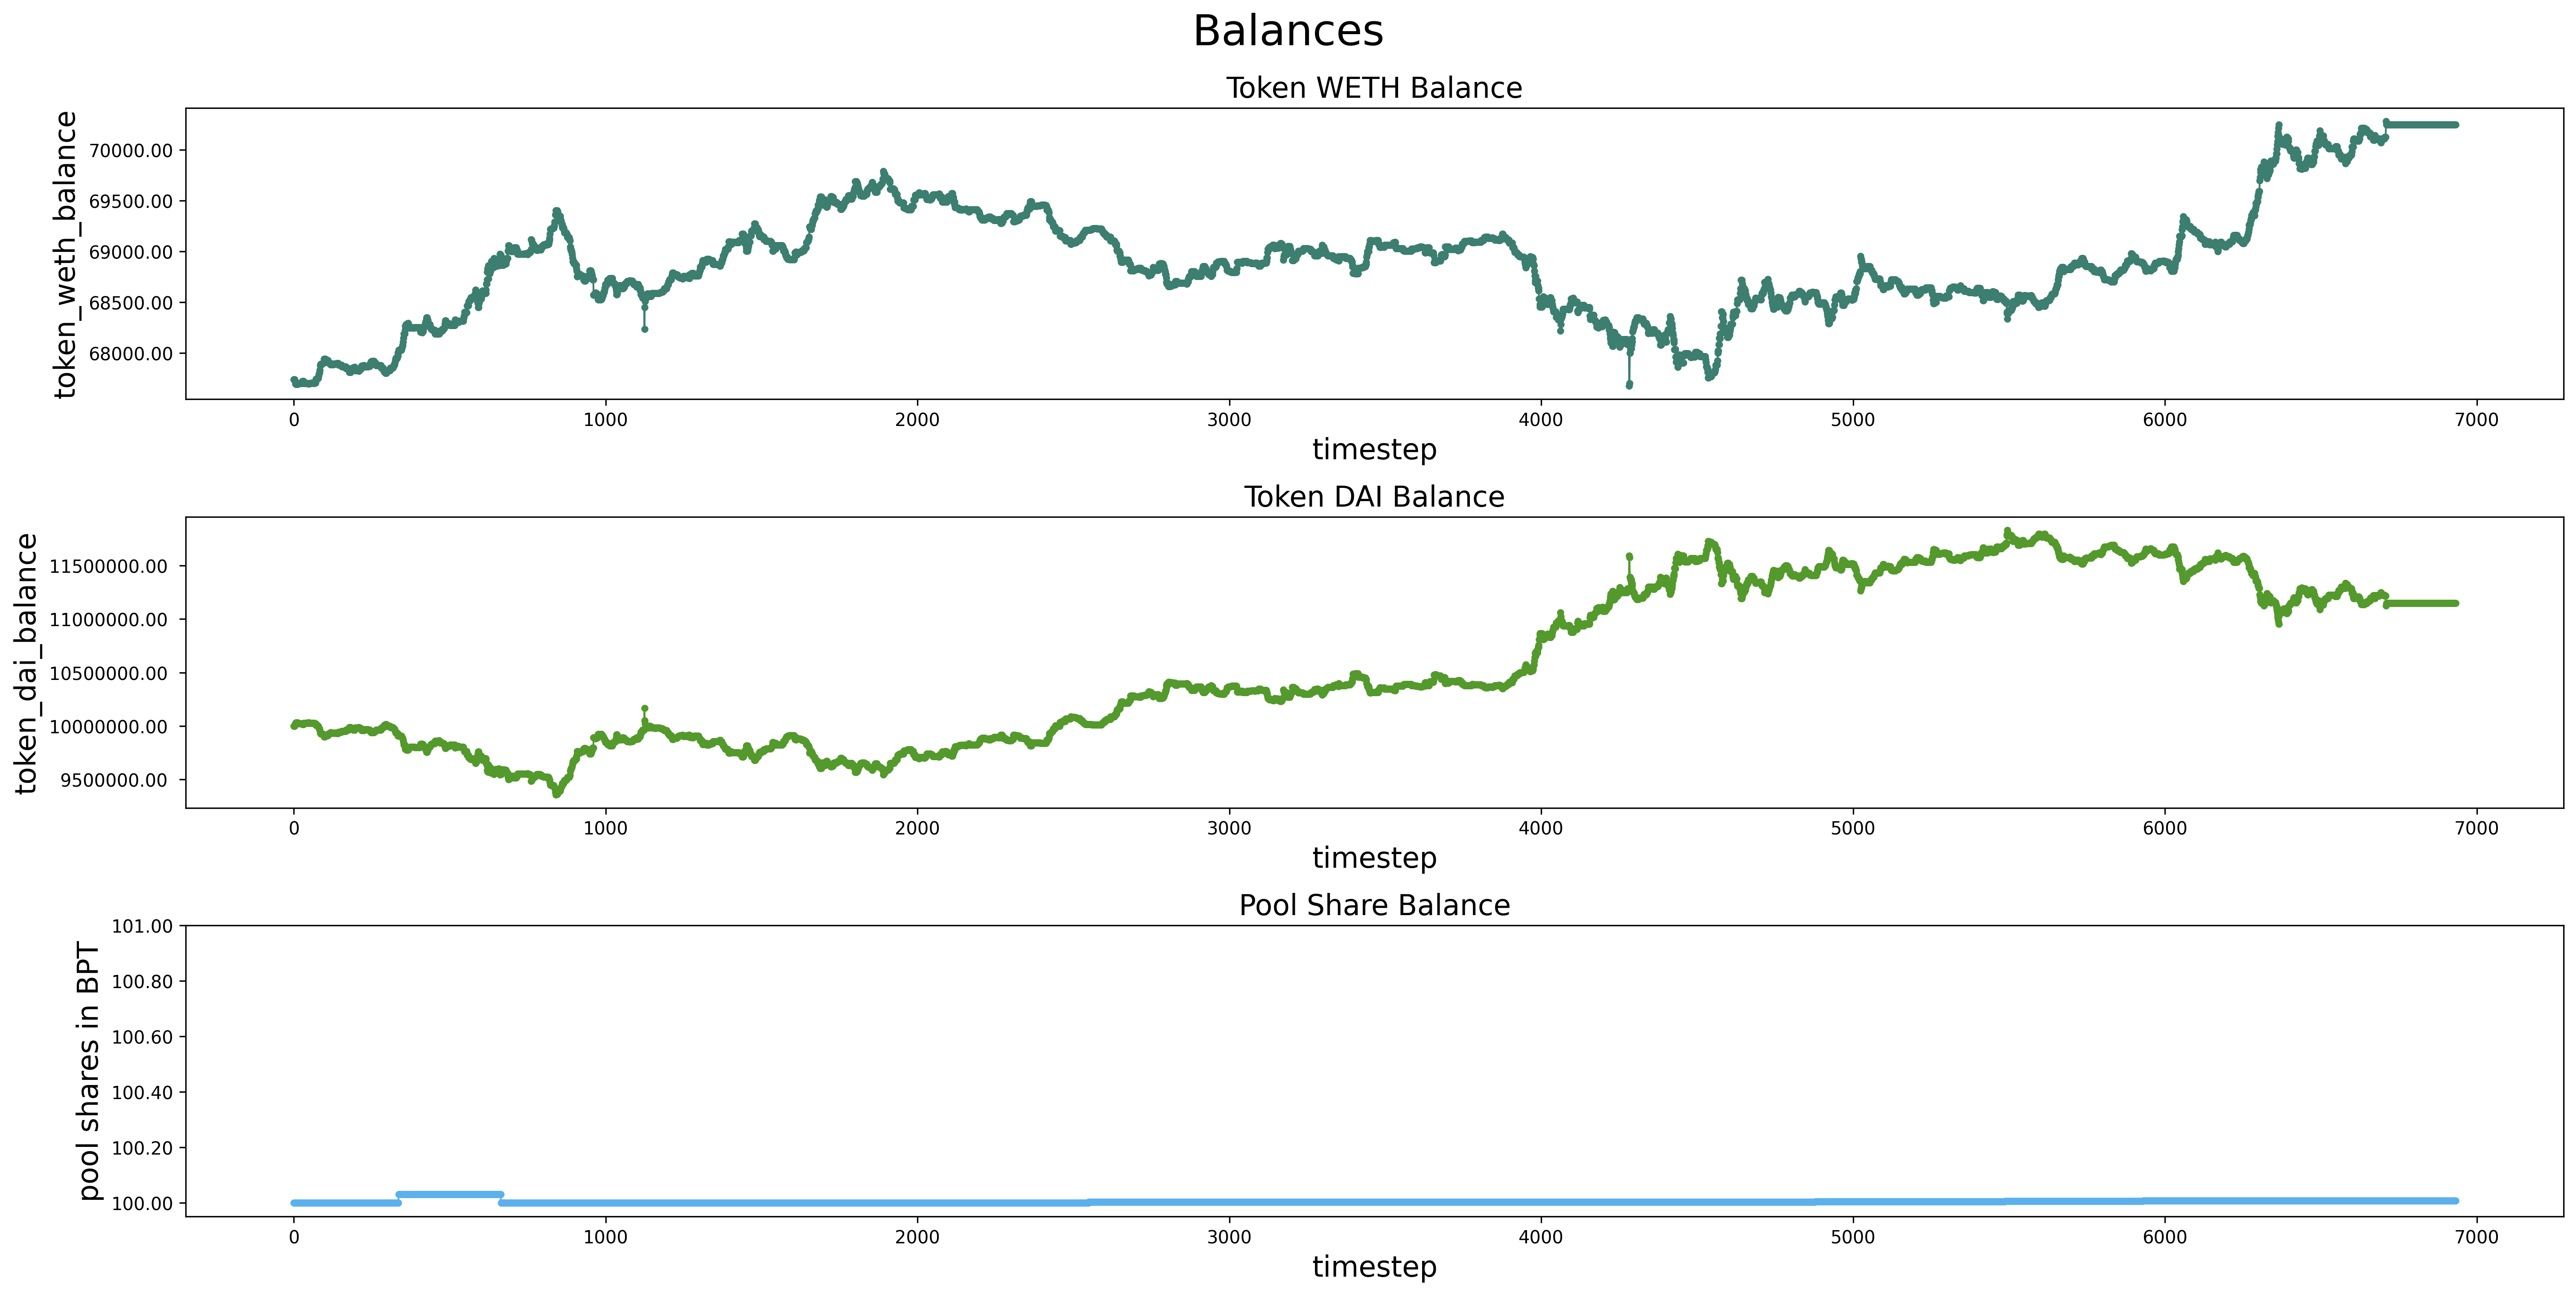

Minimum number of pool shares over time:
99.9988155836138


In [10]:
#USE VALUES DIRECTLY FROM DATAFRAME ZERO (p_df)

x = p_df['timestep'] #change to datetime, solve processing issue
y1 = p_df['token_weth_balance']
y2 = p_df['token_dai_balance']
y3 = p_df['pool_shares']

plt.figure()
fig, axs = plt.subplots(figsize=(20,10), dpi=300, ncols=1, nrows=3, constrained_layout=True)
fig.suptitle('Balances', fontsize=24)
axs[0].plot(x, y1, linewidth=1, marker=".", color="#3C7E6F")
axs[0].set_title('Token WETH Balance', fontsize=16)
axs[0].set_xlabel('timestep', fontsize=16)
axs[0].set_ylabel('token_weth_balance', fontsize=16)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

axs[1].plot(x, y2, linewidth=1, marker=".", color="#53992C")
axs[1].set_title('Token DAI Balance', fontsize=16)
axs[1].set_xlabel('timestep', fontsize=16)
axs[1].set_ylabel('token_dai_balance', fontsize=16)
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))


axs[2].plot(x, y3, linewidth=1, marker=".", color="#5CB1EC")
axs[2].set_ylim([99.95,101])
axs[2].set_title('Pool Share Balance', fontsize=16)
axs[2].set_xlabel('timestep', fontsize=16)
axs[2].set_ylabel('pool shares in BPT', fontsize=16)
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f'))

plt.show()

print(f'Minimum number of pool shares over time:')
print(p_df['pool_shares'].min())

### Observations:

1.Observe arbitrage trading behavior
- there are periods diplaying either more interest in ETH or DAI (see rough curve direction upwards, downwards)
- how does that correlate with arbitrage gaps/arbitrage trading (assumption: a sequence of trades pushing the curve in the same direction are trades until an arbitrage gap is closed
- in future versions we might be able to classify arbitrage trades. What if it turns out that 90% of trades on typical AMMs are arbitrage trades? Isn't this a huge value extract, too big to ignore? DAMMs come to the rescue :)

### D1.2 Token Value and Prices

In [11]:
#ANALYSE TVL
#CREATE CUSTOMIZED DATAFRAME FROM DATAFRAME ZERO (p_df)

tvl_p_df = pd.DataFrame(columns=['total_token_value_TVL', 'timestep', 'pool_shares'])
tvl_p_df['timestep'] = p_df['timestep'] 
tvl_p_df['pool_shares'] = p_df['pool_shares'] 
tvl_p_df['date'] = p_df['change_datetime'] 

#provide list of tokens (can perhaps be refactored to pull automatically from genesis_state.py?)
tlist = ('dai','weth')

# append existing columns (balance+price), and create new column for values
for i in tlist:
    tvl_p_df[f'token_{i}_balance'] = p_df[f'token_{i}_balance'] 
    tvl_p_df[f'token_{i}_price'] = p_df[f'token_{i}_value'] 
    tvl_p_df[f'token_{i}_value'] = tvl_p_df[f'token_{i}_balance']*tvl_p_df[f'token_{i}_price']

# calculate TVL
for i in tlist: #needs refactoring, so that we not only pick a+b but all tokens (up to 8) values
    a = tvl_p_df[f'token_{tlist[0]}_value']
    b = tvl_p_df[f'token_{tlist[1]}_value']
    tvl_p_df['total_token_value_TVL'] = a + b
tvl_p_df.tail(10) 

,total_token_value_TVL,timestep,pool_shares,date,token_dai_balance,token_dai_price,token_dai_value,token_weth_balance,token_weth_price,token_weth_value
6923,5.538518e+07,6923,100.007809,2020-12-22T23:10:00+00:00,1.115088e+07,1.002187,1.117526e+07,70246.955213,629.350,4.420992e+07
6924,5.535988e+07,6924,100.007809,2020-12-22T23:15:00+00:00,1.115088e+07,1.001902,1.117209e+07,70246.955213,629.035,4.418779e+07
6925,5.533063e+07,6925,100.007809,2020-12-22T23:20:00+00:00,1.115088e+07,1.001704,1.116988e+07,70246.955213,628.650,4.416075e+07
6926,5.547781e+07,6926,100.007809,2020-12-22T23:25:00+00:00,1.115088e+07,1.001768,1.117060e+07,70246.955213,630.735,4.430721e+07
6927,5.559564e+07,6927,100.007809,2020-12-22T23:30:00+00:00,1.115088e+07,1.002067,1.117393e+07,70246.955213,632.365,4.442172e+07
6928,5.560194e+07,6928,100.007809,2020-12-22T23:35:00+00:00,1.115088e+07,1.002002,1.117320e+07,70246.955213,632.465,4.442874e+07
6929,5.558984e+07,6929,100.007809,2020-12-22T23:40:00+00:00,1.115088e+07,1.001831,1.117129e+07,70246.955213,632.320,4.441855e+07
6930,5.557893e+07,6930,100.007809,2020-12-22T23:45:00+00:00,1.115088e+07,1.001860,1.117162e+07,70246.955213,632.160,4.440732e+07
6931,5.561978e+07,6931,100.007809,2020-12-22T23:50:00+00:00,1.115088e+07,1.001711,1.116996e+07,70246.955213,632.765,4.444981e+07
6932,5.569090e+07,6932,100.007809,2020-12-22T23:55:00+00:00,1.115088e+07,1.002042,1.117365e+07,70246.955213,633.725,4.451725e+07


<Figure size 432x288 with 0 Axes>

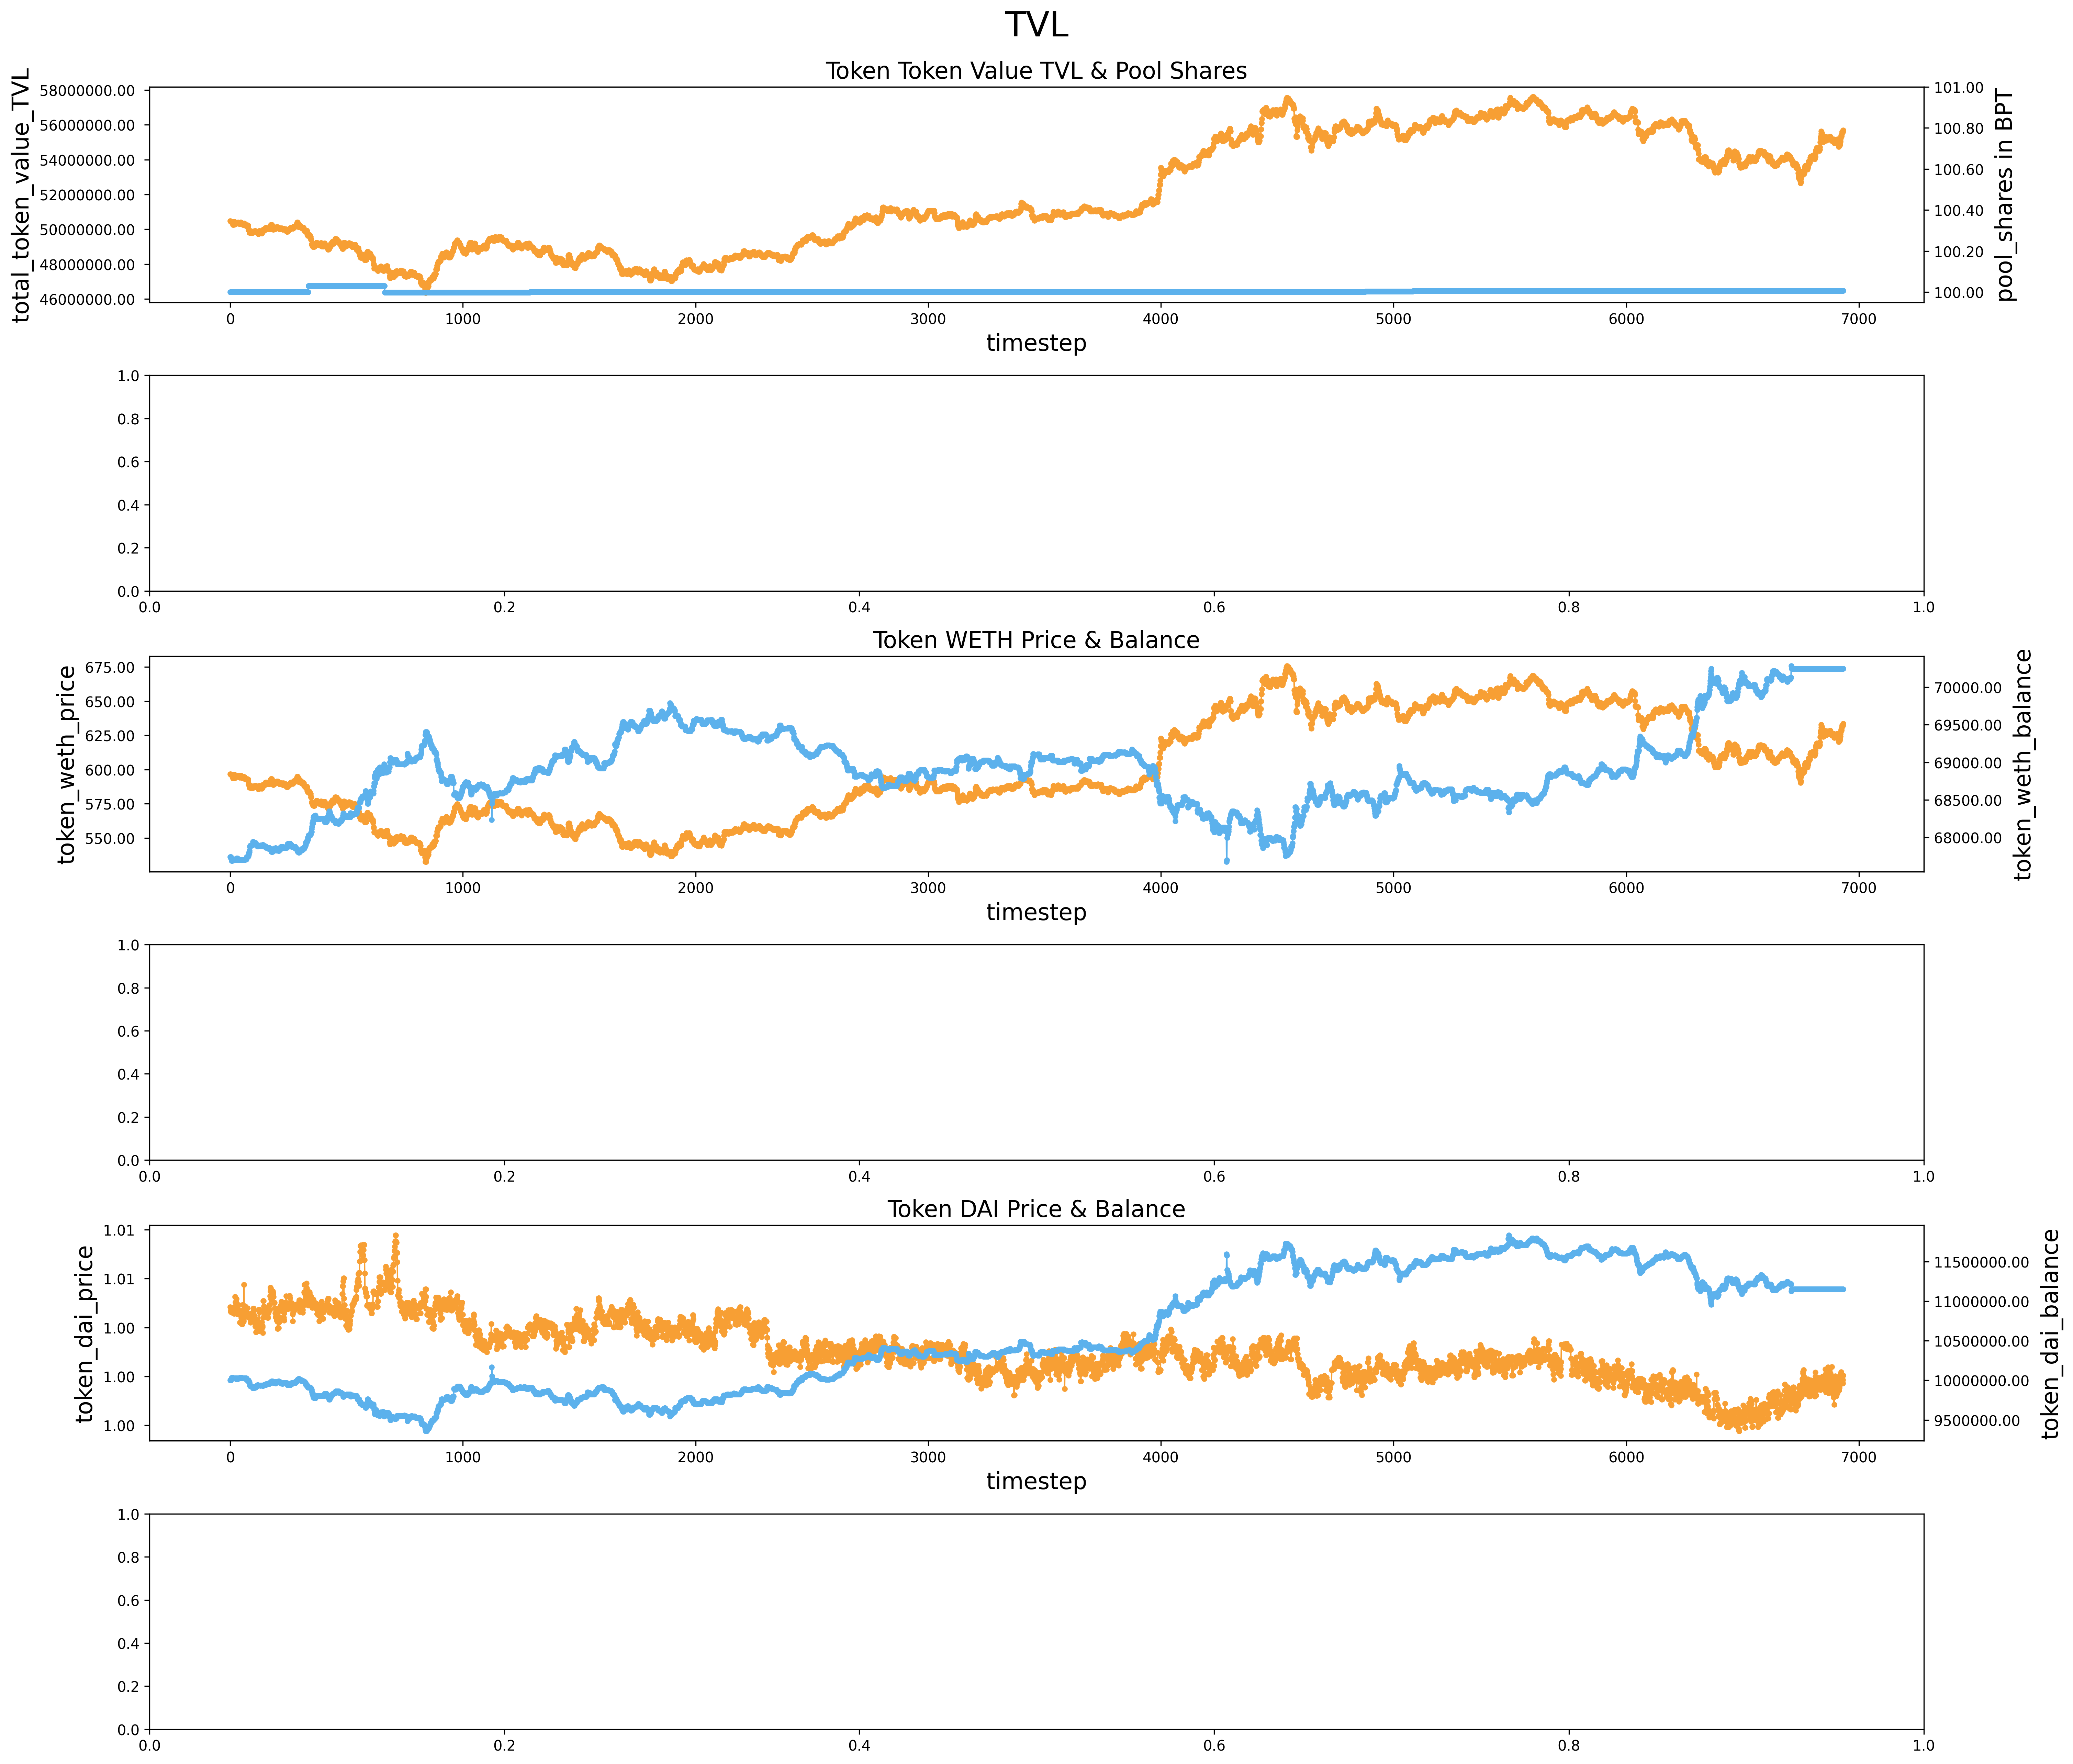

Start/End Date:
2020-12-07 13:34:14
2020-12-22T23:55:00+00:00


In [12]:
x = tvl_p_df['timestep'] #change to datetime, solve processing issue
y1 = tvl_p_df['total_token_value_TVL']
y2 = tvl_p_df['pool_shares']
y3 = tvl_p_df['token_weth_price']
y4 = tvl_p_df['token_weth_balance']
y5 = tvl_p_df['token_dai_price']
y6 = tvl_p_df['token_dai_balance']


plt.figure()
fig, axs = plt.subplots(figsize=(20,17), dpi=300, ncols=1, nrows=6, constrained_layout=True)
fig.suptitle('TVL', fontsize=24)
axs[0].plot(x, y1, linewidth=1, marker=".", color="#F79F34")
axs[0].set_title('Token Token Value TVL & Pool Shares', fontsize=16)
axs[0].set_xlabel('timestep', fontsize=16)
axs[0].set_ylabel('total_token_value_TVL', fontsize=16)
axs[0].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))
axs[1] = axs[0].twinx() 
axs[1].plot(x, y2, linewidth=1, marker=".", color="#5CB1EC")
axs[1].set_ylabel('pool_shares in BPT', fontsize=16)
axs[1].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))
axs[1].set_ylim([99.95,101])

axs[2].plot(x, y3, linewidth=1, marker=".", color="#F79F34")
axs[2].set_title('Token WETH Price & Balance', fontsize=16)
axs[2].set_xlabel('timestep', fontsize=16)
axs[2].set_ylabel('token_weth_price', fontsize=16)
axs[2].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))
#axs[2].set_ylim([596.5,597.5])
axs[3] = axs[2].twinx() 
axs[3].plot(x, y4, linewidth=1, marker=".", color="#5CB1EC")
axs[3].set_ylabel('token_weth_balance', fontsize=16)
axs[3].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))


axs[4].plot(x, y5, linewidth=1, marker=".", color="#F79F34")
axs[4].set_title('Token DAI Price & Balance', fontsize=16)
axs[4].set_xlabel('timestep', fontsize=16)
axs[4].set_ylabel('token_dai_price', fontsize=16)
axs[4].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))
#axs[4].set_ylim([1.003,1.006])
axs[5] = axs[4].twinx() 
axs[5].plot(x, y6, linewidth=1, marker=".", color="#5CB1EC")
axs[5].set_ylabel('token_dai_balance', fontsize=16)
axs[5].yaxis.set_major_formatter(FormatStrFormatter('%.2f '))

plt.show()

print(f'Start/End Date:')
print(tvl_p_df.iloc[0]['date']) #sub_df.iloc[0]['A']
print(tvl_p_df.iloc[-1]['date'])
#print(p_df['pool_shares'].min())


#### Observation:
- TVL almost linearly increasing, despite the fact that pool shares (balance BPT) almost don't change at all
- WETH price remains stable (error in price feed), number of ETH in the pool is increasing overall
- DAI price remains stable, number of DAI in the pool is increasing overall
---> THERE MUST BE SOME ERROR IN THE DATA!
---> because TVL would increase due to USD increase (which we don't have)
---> because TVL would increase due to pool_balance increase (which we don't have), even though WETH/DAI balance imply an increase in liquidity
**@Vasily pls run the notebook and check, thanks**

# E. System Validation and Limitations

- move to Gitbook!
- document the steps taken to validate if the model reflects real Balancer AMM properly (Did we build the right model?)
- document the steps taken to verify if the model creates reliable results (Did we build the model right?)

### Notes (Draft!)
**a) BMath Calculations:**  
Our goal is to implement the BMath calculations in this Python model in a way that it replicates *exactly* the calculation results in an EVM.

We've verified the model with a series of tests:
- create tests using balancer's smart contract repos
- generate a pool contract in a local EVM, do a swap or whatever operation, 
- put those input outputs as a test in python, port the code, test to see if the results match

**b) external USD price feed** 
- in this simulation we're using historical USD prices from xxx (source)  
- to map blocks and transactions we've ... (how we parsed USD price feed)

**c) Our simulation does not include:**  
- gas prices or add_fees when adding liquidity  
- 

**Results: (summarize)**

(Notes for ourselves:
- assertAlmostEqual takes 7 decimal places for comparision, sometimes we had to set 5 decimal places for the test to pass
- we could publish the EVM tests  as companion in the docs later but right now is very rough code
- to run the test go to your virtual env, instlal requirements with pip, then run pytest
- they should pass
- when everything is tested and works as the contracts, we could move on to cadCAD stuff

According to Balancer.finance documentation "The formulas are sufficient to describe the functional specification, but they are not straightforward to implement for the EVM, in part due to a lack of mature fixed-point math libraries." (https://docs.balancer.finance/core-concepts/protocol/index))

# F. Comments

closing comments if appropriate, and links to other notebooks/other use cases